In [43]:
import pandas as pd
import re
import string
import collections
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/train_amazon_1_lakh.csv')
df_test = pd.read_csv('/content/drive/MyDrive/sentiment_analysis/test_amazon_10_thous.csv')

In [44]:
df_train = pd.read_csv('train_amazon_1_lakh.csv')
df_test = pd.read_csv('test_amazon_10_thous.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
df_train

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
100014,1,dont buy this.,i wish i could give AFI 0 stars. all they make...
100015,1,Kiddie-Core to the max,(...) AFI comes off like a terrible C-grade mi...
100016,2,*bawls bc she can't find her AoD CD*,"Wonderful, wonderful. *beams* Beautiful album,..."
100017,2,AWESOME!,This CD is AWESOME! Some people say this is te...


In [46]:
df_test

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
9996,2,Love it Love it Love it,"My daughter loves this, she is six months old ..."
9997,1,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...
9998,2,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...
9999,1,You can do better,I am a first time mom and loved the baby einst...


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100019 entries, 0 to 100018
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                      Non-Null Count   Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                      --------------   ----- 
 0   2                                  

In [48]:
df_train.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [49]:
df_train.columns = ['label', 'title', 'text']
df_train.head()

,label,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [50]:
df_test.columns = ['label', 'title', 'text']
df_train.head()

,label,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


In [51]:
df_train.isna().sum()

label    0
title    3
text     0
dtype: int64

In [52]:
df_test.isna().sum()

label    0
title    1
text     0
dtype: int64

In [53]:
df_test.dropna()

,label,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
9996,2,Love it Love it Love it,"My daughter loves this, she is six months old ..."
9997,1,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...
9998,2,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...
9999,1,You can do better,I am a first time mom and loved the baby einst...


In [54]:
df_train.dropna()

,label,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
100014,1,dont buy this.,i wish i could give AFI 0 stars. all they make...
100015,1,Kiddie-Core to the max,(...) AFI comes off like a terrible C-grade mi...
100016,2,*bawls bc she can't find her AoD CD*,"Wonderful, wonderful. *beams* Beautiful album,..."
100017,2,AWESOME!,This CD is AWESOME! Some people say this is te...


In [55]:
print(df_train['label'].value_counts())
print(df_test['label'].value_counts())

2    51281
1    48738
Name: label, dtype: int64
2    5125
1    4876
Name: label, dtype: int64


In [56]:
def concat_columns(df, col1, col2, new_col):
    df[new_col] = df[col1].apply(str) + ' ' + df[col2].apply(str)
    df.drop(col2, axis = 1, inplace = True)
    return df
df_train = concat_columns(df_train, 'text', 'title', 'text')
df_test = concat_columns(df_test, 'text', 'title', 'text')

In [57]:
df_train['label'] = df_train['label'].map({1:0, 2:1})
df_test['label'] = df_test['label'].map({1:0, 2:1})

In [58]:
df_train.head()

,label,text
0,1,I'm reading a lot of reviews saying that this ...
1,1,This soundtrack is my favorite music of all ti...
2,1,I truly like this soundtrack and I enjoy video...
3,1,"If you've played the game, you know how divine..."
4,1,I am quite sure any of you actually taking the...


In [59]:
#Function to remove unwanted characters
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-zÀ-ú ]+', '', text)
    # Analyzing the most used words below, i chose to exclude these because there are too many and are unnecessary
    text = re.sub('movi', '', text)
    # Convert to lower case
    text = text.lower()
    # remove scores
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Applying the function
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [60]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
def remove_stopwords(texto):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(texto.lower())
    return " ".join([token for token in tokens if token not in stop_words])

# Applying the function
df_train['text'] = df_train['text'].apply(remove_stopwords)
df_test['text'] = df_test['text'].apply(remove_stopwords)

In [62]:
def normalize_text(text):
    stemmer = SnowballStemmer("english")
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        normalized_text.append(stemmed_word)
    return ' '.join(normalized_text)
    
# Applying the function
df_train['text'] = df_train['text'].apply(normalize_text)
df_test['text'] = df_test['text'].apply(normalize_text)

In [63]:
df_test['text']

0        despit fact play small portion game music hear...
1        bought charger jul work ok design nice conveni...
2        check maha energi websit powerex mhcf charger ...
3        review quit bit combo player hesit due unfavor...
4        also began incorrect disc problem ive read vcr...
                               ...                        
9996     daughter love six month old weve three week ti...
9997     purchas item month old babi love entertain kep...
9998     daughter start enjoy around month though littl...
9999     first time mom love babi einstein line great p...
10000    bought exersauc littl guy bare abl sit upright...
Name: text, Length: 10001, dtype: object

Text(0, 0.5, 'Frequency')

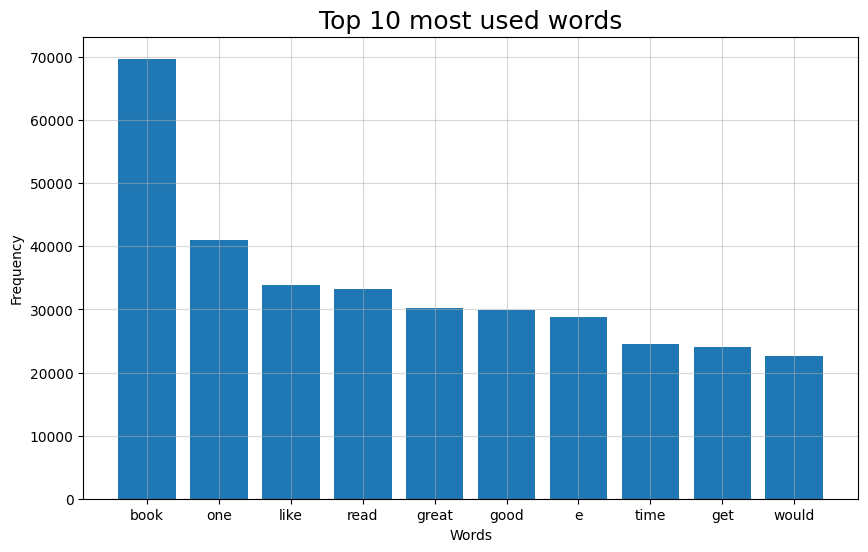

In [64]:
words = []
for text in df_train['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)

# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

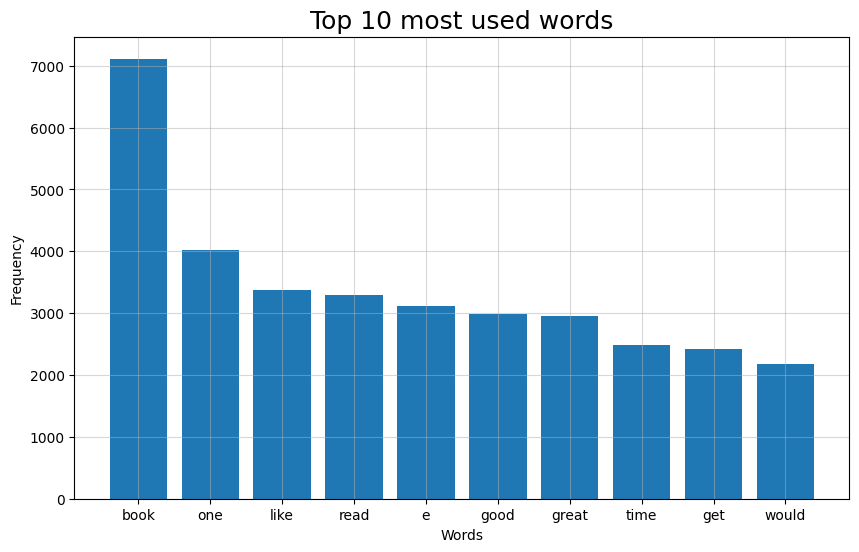

In [65]:
words = []
for text in df_test['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 10 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

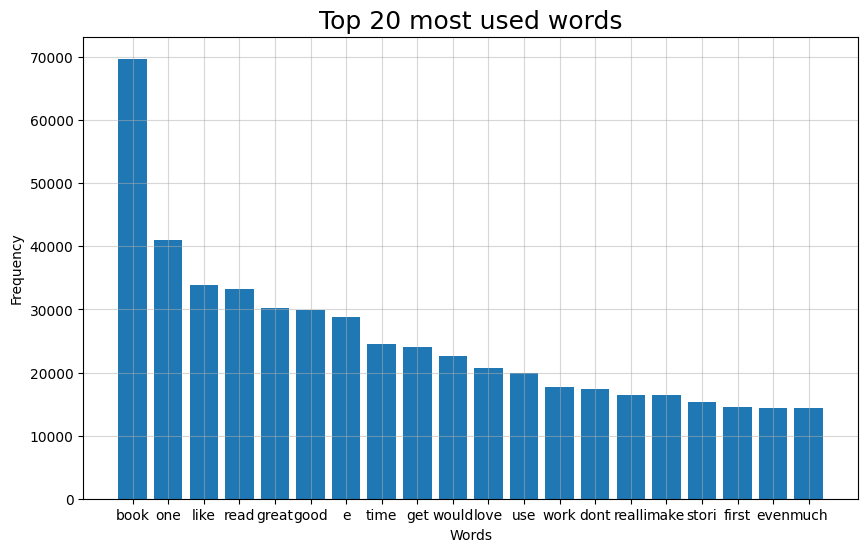

In [88]:
words = []
for text in df_train['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 20 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

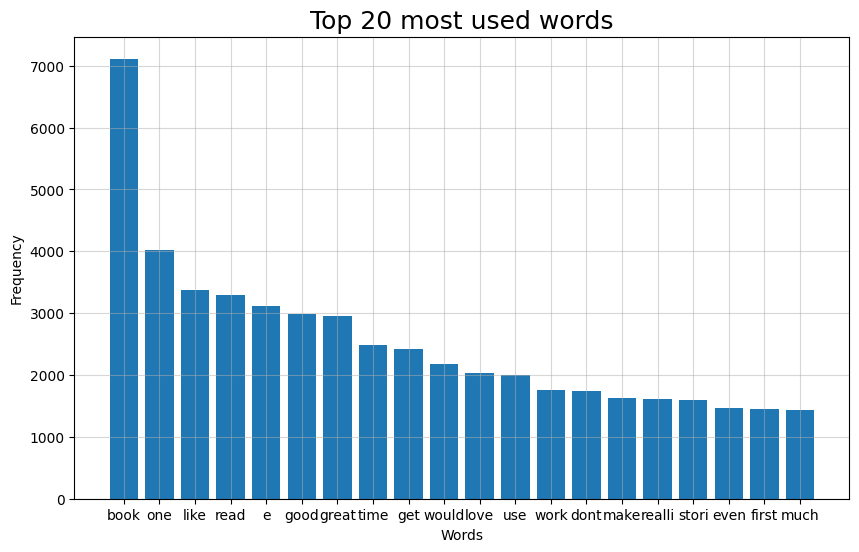

In [67]:
words = []
for text in df_test['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Figure Size
plt.figure(figsize = (10, 6))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

# Creating a y axis with words
plt.xticks(range(len(top_words)), list(top_words.keys()))

# Grid Opacity
plt.grid(alpha = 0.5)
# Title and labels
plt.title('Top 20 most used words', fontsize = 18)
plt.xlabel('Words')
plt.ylabel('Frequency')

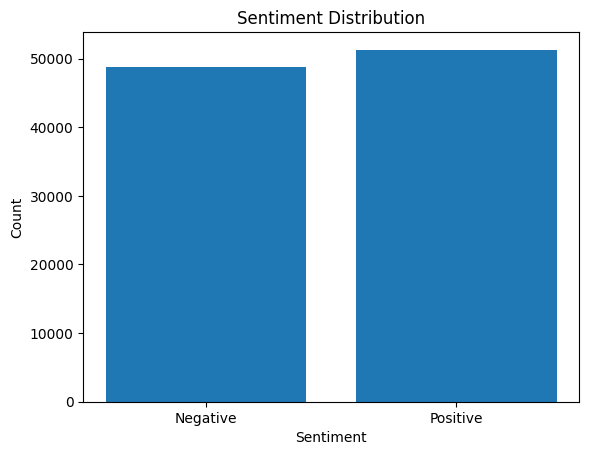

In [68]:
sentiment_counts = df_train['label'].value_counts()
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
# Add labels to the bars
plt.xticks(sentiment_counts.index, ['Positive', 'Negative'])
plt.show()

FNN

In [ ]:
# Maximum number of words to be considered in the vocabulary
max_words = 10000 
# Maximum number of tokens in a sequence
max_len = 200 
# Tokenizer
tokenizer = Tokenizer(num_words = max_words) 
# Snap tokenizer to text data
tokenizer.fit_on_texts(df_train['text']) 
# Converts texts into strings of numbers
sequences_train = tokenizer.texts_to_sequences(df_train['text']) 
sequences_val = tokenizer.texts_to_sequences(df_test['text']) 
# Mapping words to indexes
word_index = tokenizer.word_index 

In [ ]:
# Sequence padding
data_train = pad_sequences(sequences_train, maxlen = max_len)
data_val = pad_sequences(sequences_val, maxlen = max_len)

In [ ]:
# Create the model
model = tf.keras.Sequential()
model.add(Embedding(max_words, 16, input_length = max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Checking summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit model
history = model.fit(data_train, df_train['label'], epochs = 15, batch_size = 64, validation_data = (data_val, df_test['label']))

Epoch 1/15
1563/1563 [==============================] - 72s 42ms/step - loss: 0.6033 - accuracy: 0.7319 - val_loss: 0.4753 - val_accuracy: 0.8321
Epoch 2/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4007 - accuracy: 0.8592 - val_loss: 0.3565 - val_accuracy: 0.8660
Epoch 3/15
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3270 - accuracy: 0.8749 - val_loss: 0.3205 - val_accuracy: 0.8724
Epoch 4/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2983 - accuracy: 0.8828 - val_loss: 0.3072 - val_accuracy: 0.8757
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2831 - accuracy: 0.8877 - val_loss: 0.3016 - val_accuracy: 0.8767
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2735 - accuracy: 0.8918 - val_loss: 0.3010 - val_accuracy: 0.8784
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2665 - accuracy: 0.8949 - val_loss: 0.2997 - val_acc

In [ ]:
loss, accuracy = model.evaluate(data_val, df_test['label'], verbose = 0)
print('Accuracy: %f' % (accuracy*100))
print("loss",loss)

Accuracy: 88.221180
loss 0.3048619031906128


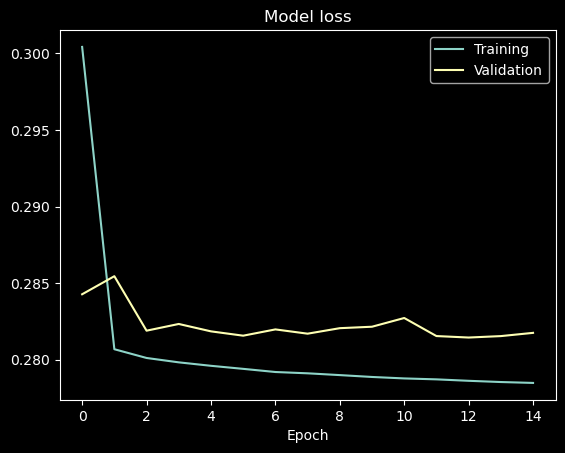

In [ ]:
# Loss graph
plt.style.use('dark_background')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

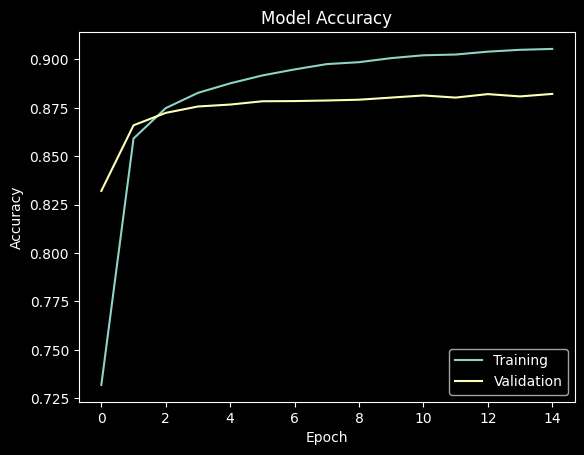

In [ ]:
# Accuracy graph
plt.style.use('dark_background')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

LSTM

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import numpy as np
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000 , 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16 , return_sequences=  True)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
df_train.value_counts()

label  text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1      around ten first saw space love even though time thought level technolog attribut human littl far fetch even young mind knew go moon substanti form alway thought space space would made littl plausibl begin howev said fun seri doesnt love eagl moon base design colorstrip armband admit stori especi nd second push even ten year old limit imagin forget episod crewmemb regress back forth cavemen yet everi time metamorph jump cloth chang one moment cavemen w

In [ ]:
df_test.value_counts

<bound method DataFrame.value_counts of        label                                               text
0          1  despit fact play small portion game music hear...
1          0  bought charger jul work ok design nice conveni...
2          1  check maha energi websit powerex mhcf charger ...
3          1  review quit bit combo player hesit due unfavor...
4          0  also began incorrect disc problem ive read vcr...
...      ...                                                ...
9996       1  daughter love six month old weve three week ti...
9997       0  purchas item month old babi love entertain kep...
9998       1  daughter start enjoy around month though littl...
9999       0  first time mom love babi einstein line great p...
10000      1  bought exersauc littl guy bare abl sit upright...

[10001 rows x 2 columns]>

In [ ]:
df_train.head

<bound method NDFrame.head of         label                                               text
0           1  im read lot review say best game soundtrack fi...
1           1  soundtrack favorit music time hand intens sad ...
2           1  truli like soundtrack enjoy video game music p...
3           1  youv play game know divin music everi singl so...
4           1  quit sure actual take time read play game leas...
...       ...                                                ...
100014      0  wish could give afi star make meaningless goth...
100015      0  afi come like terribl cgrade mixtur bad horror...
100016      1  wonder wonder beam beauti album love first got...
100017      1  cd awesom peopl say terribl compar old stuff b...
100018      1  bsit mark transit phase afi album confirm perm...

[100019 rows x 2 columns]>

In [ ]:
X_train = np.array(df_train['text'] , dtype = 'str')

In [ ]:
X_train[:3]

array(['im read lot review say best game soundtrack figur id write review disagre bit opinino yasunori mitsuda ultim masterpiec music timeless im listen year beauti simpli refus fadeth price tag pretti stagger must say go buy cd much feel would worth everi penni best soundtrack ever anyth',
       'soundtrack favorit music time hand intens sad prisr fate mean youv play game hope distant promis girl stole star import inspir person throughout teen year higher energi track like chrono cross time scar time dreamwatch chronomantiqu indefin remenisc chrono trigger absolut superb wellthi soundtrack amaz music probabl best compos work havent heard xenogear soundtrack cant say sure even youv never play game would worth twice price buy iti wish could give star amaz',
       'truli like soundtrack enjoy video game music play game music enjoy truli relax peacefulon disk favorit scar time life death forest illus fortress ancient dragon lost fragment drown valleydisk two draggon galdorb home chronom

In [ ]:
y_train = np.array(df_train['label'] , dtype = 'int32')

In [ ]:
x_test =  np.array(df_test['text'] , dtype = 'str')
y_test = np.array(df_test['label'] , dtype = 'int32')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         4224      
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, None, 32)         128       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [ ]:
average_len = np.mean([len(item) for item in X_train])

In [ ]:
average_len

241.2176286505564

In [ ]:
max_len = int(average_len + 100)

In [ ]:
tokenizer = Tokenizer(num_words = 10_000 , oov_token='') 
tokenizer.fit_on_texts(X_train)

train_seq = tokenizer.texts_to_sequences(X_train) 
test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
train_pad = pad_sequences(train_seq , maxlen = max_len )
test_pad = pad_sequences(test_seq , maxlen = max_len )

In [ ]:
train_label = to_categorical(y_train) #this if you want to one hot , but I 'm note going to use this
test_label = to_categorical(y_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000 , 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16 , return_sequences=  True)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 32)         4224      
 nal)                                                            
                                                                 
 batch_normalization_1 (Batc  (None, None, 32)         128       
 hNormalization)                                                 
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [ ]:
history = model.fit(train_pad , y_train , epochs = 10)

Epoch 1/10
2814/2814 [==============================] - 191s 64ms/step - loss: 0.3179 - accuracy: 0.8627 - val_loss: 0.3105 - val_accuracy: 0.8712
Epoch 2/10
2814/2814 [==============================] - 120s 43ms/step - loss: 0.2398 - accuracy: 0.9029 - val_loss: 0.2857 - val_accuracy: 0.8811
Epoch 3/10
2814/2814 [==============================] - 111s 39ms/step - loss: 0.1986 - accuracy: 0.9216 - val_loss: 0.3039 - val_accuracy: 0.8732
Epoch 4/10
2814/2814 [==============================] - 112s 40ms/step - loss: 0.1589 - accuracy: 0.9391 - val_loss: 0.3517 - val_accuracy: 0.8678
Epoch 5/10
2814/2814 [==============================] - 115s 41ms/step - loss: 0.1252 - accuracy: 0.9533 - val_loss: 0.3910 - val_accuracy: 0.8628
Epoch 6/10
2814/2814 [==============================] - 115s 41ms/step - loss: 0.0985 - accuracy: 0.9640 - val_loss: 0.4712 - val_accuracy: 0.8621
Epoch 7/10
2814/2814 [==============================] - 113s 40ms/step - loss: 0.0774 - accuracy: 0.9725 - val_loss: 0

In [ ]:
model.evaluate(test_pad,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.6465 - accuracy: 0.8601


[0.6465455293655396, 0.8601139783859253]

HAN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Model
from keras.layers import Input, Embedding, GRU, Dense, Dropout, TimeDistributed
from keras.layers import Bidirectional, Attention

In [ ]:
# Prepare the training data
X_train = df_train['text']
y_train= df_train['label']

# Prepare the test data
X_test= df_test['text']
y_test= df_test['label']


In [ ]:
# Tokenize and pad the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
max_sentences = 10  # You can adjust the maximum number of sentences in a review
max_sentence_length = 100  # You can adjust the maximum length of each sentence
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sentence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sentence_length)
# Build the HAN model
input_word = Input(shape=(max_sentence_length,))
word_embedding = Embedding(input_dim=vocab_size, output_dim=100)(input_word)
word_encoder = Bidirectional(GRU(units=64, return_sequences=True))(word_embedding)
word_attention = Attention()([word_encoder, word_encoder])
word_encoder = TimeDistributed(Dense(64))(word_attention)
word_encoder = Dropout(0.3)(word_encoder)
sentence_encoder = Bidirectional(GRU(units=64, return_sequences=True))(word_encoder)
sentence_attention = Attention()([sentence_encoder, sentence_encoder])
sentence_encoder = TimeDistributed(Dense(64))(sentence_attention)
sentence_encoder = Dropout(0.3)(sentence_encoder)
output = Dense(1, activation='sigmoid')(sentence_encoder)

In [ ]:
model = Model(inputs=input_word, outputs=output)

In [ ]:
# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train_pad,y_train,epochs=30,batch_size=40)



Epoch 1/30
2501/2501 [==============================] - 148s 54ms/step - loss: 0.3256 - accuracy: 0.8599
Epoch 2/30
2501/2501 [==============================] - 61s 24ms/step - loss: 0.1966 - accuracy: 0.9238
Epoch 3/30
2501/2501 [==============================] - 59s 23ms/step - loss: 0.1179 - accuracy: 0.9573
Epoch 4/30
2501/2501 [==============================] - 56s 23ms/step - loss: 0.0654 - accuracy: 0.9774
Epoch 5/30
2501/2501 [==============================] - 55s 22ms/step - loss: 0.0375 - accuracy: 0.9872
Epoch 6/30
2501/2501 [==============================] - 57s 23ms/step - loss: 0.0214 - accuracy: 0.9928
Epoch 7/30
2501/2501 [==============================] - 55s 22ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 8/30
2501/2501 [==============================] - 55s 22ms/step - loss: 0.0102 - accuracy: 0.9965
Epoch 9/30
2501/2501 [==============================] - 56s 22ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 10/30
2501/2501 [==============================] - 55s 22

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:",loss)
print("Test Accuracy:",accuracy)

313/313 [==============================] - 4s 9ms/step - loss: 0.9397 - accuracy: 0.8580
Test Loss: 0.9397412538528442
Test Accuracy: 0.8580231666564941


Ensemble

In [69]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [70]:
# Separate the reviews and labels
train_reviews = df_train['text'].values
train_labels =df_train['label'].values
test_reviews = df_test['text'].values
test_labels = df_test['label'].values

In [71]:
# Create a bag-of-words representation of the reviews
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_reviews)
test_features = vectorizer.transform(test_reviews)

In [73]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(train_features, train_labels)

RandomForestClassifier()

In [74]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_labels)

MultinomialNB()

In [75]:
# Make predictions on the testing dataset using both classifiers
rf_predictions = rf_classifier.predict(test_features)
nb_predictions = nb_classifier.predict(test_features)

In [95]:
# Make predictions on the testing dataset using both classifiers
rf_predictions = rf_classifier.predict(test_features)
nb_predictions = nb_classifier.predict(test_features)

# Combine the predictions using a voting scheme
ensemble_predictions = []
for rf_pred, nb_pred in zip(rf_predictions, nb_predictions):
    if rf_pred == nb_pred:
        ensemble_predictions.append(rf_pred)
    else:
        ensemble_predictions.append(rf_pred)  # You can modify the voting scheme based on your preference

In [96]:
# Calculate the accuracy of the ensemble predictions
ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
print('Ensemble Accuracy:', ensemble_accuracy)

Ensemble Accuracy: 0.8586141385861414
